<a href="https://colab.research.google.com/github/Hjhirp/Tweet-Topic-Modelling/blob/main/Notebook/Tweet_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Loading Required Libraries**

In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 5.2 MB/s 


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 48.5 MB/s 
     |████████████████████████████████| 11.3 MB 46.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=e0677bd869d884fc9b6cb8143c5b85d6fbf5a85f619ce701e902e711441d545d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet
import string
nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from spellchecker import SpellChecker

#Visualizing the LDA model
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.corpora import Dictionary

from IPython.display import clear_output

import pyLDAvis.gensim_models as gensim_models
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


## **Loading Data**

In [ ]:
f1 = pd.read_csv("Reddit_HYD")
# df1 =
print(f"Shape of the Data: {f1.shape}")
f1.head()

FileNotFoundError: ignored

In [ ]:
df = pd.concat((f1,f2, f3,f4), axis =0).drop('Unnamed: 0', axis =1)
df.head()

,Datetime,Tweet Id,Text,Username
0,2021-05-24 09:35:23+00:00,1396761739748732932,#Hyderabad needs lot over #footbridge (#pedest...,rg_pavan
1,2021-05-15 18:08:43+00:00,1393629433181851649,@SonuSood @flyspicejet I belong to very poor ...,EinsteinKing7
2,2021-05-13 11:48:56+00:00,1392809078309593090,@overcover06 @BufferedStart Hyderabad traffic ...,sricharannch
3,2021-05-12 11:27:18+00:00,1392441248049295361,@SoodFoundation @SonuSood \n*Help manoj*\nPati...,PrAvEeN_GaLi97
4,2021-05-12 09:57:26+00:00,1392418630990581761,BETHALA MANOJ BABU \nHe met with an road accid...,Vineeth029


## **Checking Missing Values**

In [ ]:
print(f"Number of Null Values: {df.isnull().sum().sum()}")

Number of Null Values: 0


## **Text Preprocessing:**
- Processing texts using regex
- Redefining English Stopwords
- Only selecting Nouns and Tokenization
- Lemmatization, Checking & correcting spellings and selected words which are more than 3 characters
- Dropping rows who doesn't have any words after preprocessing

In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase.lower()

# df['cleaned_text'] = df['Text'].apply(lambda x: decontracted(x))

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2021-05-24 09:35:23+00:00,1396761739748732932,#Hyderabad needs lot over #footbridge (#pedest...,rg_pavan
1,2021-05-15 18:08:43+00:00,1393629433181851649,@SonuSood @flyspicejet I belong to very poor ...,EinsteinKing7
2,2021-05-13 11:48:56+00:00,1392809078309593090,@overcover06 @BufferedStart Hyderabad traffic ...,sricharannch
3,2021-05-12 11:27:18+00:00,1392441248049295361,@SoodFoundation @SonuSood \n*Help manoj*\nPati...,PrAvEeN_GaLi97
4,2021-05-12 09:57:26+00:00,1392418630990581761,BETHALA MANOJ BABU \nHe met with an road accid...,Vineeth029


## **Redifining English Stopwords**

In [ ]:
# Remove words like 'nor', 'not', 'no' from stop_words
stop_words = stopwords.words('english')

for i in ['nor', 'not', 'no']:
  stop_words.remove(i)

punc = list(string.punctuation)

"""IF you have some custom stop words. Please add here."""
stop_words += punc + ['hyderabad', 'https', 'garu']

## **Only selecting Nouns and Tokenization**

In [ ]:
lemmaObject = WordNetLemmatizer()
def only_noun(docs):
  noun_docs = []
  for word in docs:
    # if nltk.pos_tag(word.split())[0][1]  in ['NN', 'NNP', 'NNPS', 'NNS',]:
   noun_docs.append(word.lower())
  return " ".join(noun_docs)

df['cleaned_text'] = df.Text.apply(lambda x: nltk.word_tokenize(x))
df.cleaned_text = df.cleaned_text.apply(only_noun)
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: decontracted(x))
df.cleaned_text.head()

0    # hyderabad needs lot over # footbridge ( # pe...
1    @ sonusood @ flyspicejet i belong to very poor...
2    @ overcover06 @ bufferedstart hyderabad traffi...
3    @ soodfoundation @ sonusood *help manoj* patie...
4    bethala manoj babu he met with an road acciden...
Name: cleaned_text, dtype: object

## **Lemmatization, Checking & correcting spellings and selected words which are more than 3 characters**

In [ ]:
spell = SpellChecker(distance=1)
def Preprocessing(docs):
  temp_docs = []
  lemma_word = lemmaObject.lemmatize(docs)
  # print(lemma_word)
  vocab = spell.correction(lemma_word)
  # print(vocab)
  for word in vocab.split():
    if word not in stop_words and len(word) > 3:
      temp_docs.append(word)

  return temp_docs

In [ ]:
# df['org_review'] = df.review
df['cleaned_text'] = df.cleaned_text.apply(Preprocessing)

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,cleaned_text
0,2021-05-24 09:35:23+00:00,1396761739748732932,#Hyderabad needs lot over #footbridge (#pedest...,rg_pavan,"[needs, footbridge, pedestrian, bridge, accide..."
1,2021-05-15 18:08:43+00:00,1393629433181851649,@SonuSood @flyspicejet I belong to very poor ...,EinsteinKing7,"[sonusood, flyspicejet, belong, poor, backgrou..."
2,2021-05-13 11:48:56+00:00,1392809078309593090,@overcover06 @BufferedStart Hyderabad traffic ...,sricharannch,"[overcover06, bufferedstart, traffic, rule, te..."
3,2021-05-12 11:27:18+00:00,1392441248049295361,@SoodFoundation @SonuSood \n*Help manoj*\nPati...,PrAvEeN_GaLi97,"[soodfoundation, sonusood, *help, manoj*, pati..."
4,2021-05-12 09:57:26+00:00,1392418630990581761,BETHALA MANOJ BABU \nHe met with an road accid...,Vineeth029,"[bethala, manoj, babu, road, accident, severe,..."


## **Dropping rows who doesn't have any words after preprocessing**

In [ ]:
df = df[df['cleaned_text'].map(lambda x: len(x)) > 1].reset_index(drop=True)

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,cleaned_text
0,2021-05-24 09:35:23+00:00,1396761739748732932,#Hyderabad needs lot over #footbridge (#pedest...,rg_pavan,"[needs, footbridge, pedestrian, bridge, accide..."
1,2021-05-15 18:08:43+00:00,1393629433181851649,@SonuSood @flyspicejet I belong to very poor ...,EinsteinKing7,"[sonusood, flyspicejet, belong, poor, backgrou..."
2,2021-05-13 11:48:56+00:00,1392809078309593090,@overcover06 @BufferedStart Hyderabad traffic ...,sricharannch,"[overcover06, bufferedstart, traffic, rule, te..."
3,2021-05-12 11:27:18+00:00,1392441248049295361,@SoodFoundation @SonuSood \n*Help manoj*\nPati...,PrAvEeN_GaLi97,"[soodfoundation, sonusood, *help, manoj*, pati..."
4,2021-05-12 09:57:26+00:00,1392418630990581761,BETHALA MANOJ BABU \nHe met with an road accid...,Vineeth029,"[bethala, manoj, babu, road, accident, severe,..."


## **Separating Features and Labels**

In [ ]:
features = df['cleaned_text'].values
# labels = df['sentiment'].values

## **Document Term Matrix (BoW)**

In [ ]:
np.random.seed(100)
dictionary = Dictionary(features)
print(dictionary)

Dictionary(11177 unique tokens: ['//t.co/pcpxlkl4xv', 'accidents', 'area', 'beeramguda', 'bridge']...)


In [ ]:
doc_term_matrix = df['cleaned_text'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

0    [(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1...
1    [(15, 1), (20, 1), (21, 1), (22, 1), (23, 1), ...
2    [(1, 1), (15, 1), (43, 1), (44, 1), (45, 1), (...
3    [(15, 1), (27, 1), (38, 1), (52, 1), (53, 1), ...
4    [(15, 1), (20, 1), (27, 1), (42, 1), (56, 1), ...
5    [(15, 1), (20, 1), (27, 1), (42, 1), (56, 1), ...
6    [(9, 1), (15, 1), (20, 1), (27, 1), (42, 1), (...
7    [(1, 1), (15, 1), (92, 1), (93, 1), (94, 1), (...
8    [(1, 1), (15, 1), (93, 1), (94, 1), (95, 1), (...
9    [(1, 1), (15, 4), (20, 3), (23, 1), (47, 1), (...
Name: cleaned_text, dtype: object

## **Latent Dirichlet Allocation(LDA)**

In [ ]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

In [ ]:
ldamodel.print_topics()

[(0,
  '0.033*"roads" + 0.016*"selling" + 0.016*"taking" + 0.015*"irregularities" + 0.015*"kindly" + 0.014*"investigate" + 0.012*"depot" + 0.012*"paying" + 0.010*"receipts" + 0.010*"issuing"'),
 (1,
  '0.017*"importance" + 0.014*"road" + 0.013*"hihyderabad" + 0.012*"70mm" + 0.011*"hyderabad_zone" + 0.011*"news" + 0.011*"withcitizen" + 0.011*"hicyberabad" + 0.010*"swachhhyd" + 0.010*"hydwatch"'),
 (2,
  '0.032*"awareness" + 0.021*"masks" + 0.017*"covid19" + 0.016*"physical" + 0.016*"created" + 0.015*"spread" + 0.014*"face" + 0.014*"avert" + 0.012*"distancing" + 0.011*"free"'),
 (3,
  '0.041*"roads" + 0.012*"till" + 0.011*"sangam" + 0.011*"time" + 0.010*"people" + 0.008*"city" + 0.007*"please" + 0.007*"release" + 0.007*"sultan" + 0.007*"telangana"'),
 (4,
  '0.047*"roads" + 0.017*"please" + 0.017*"save" + 0.016*"industry" + 0.012*"pawankalyan" + 0.011*"vakeelsaab" + 0.011*"confirmed" + 0.010*"ktrtrs" + 0.010*"road" + 0.007*"35mm"'),
 (5,
  '0.070*"traffic" + 0.058*"hydtpwebringawareness"

In [ ]:
pyLDAvis.enable_notebook()
vis = gensim_models.prepare(ldamodel,doc_term_matrix,dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.051439 -0.055144       1        1  13.846818
7     -0.096611 -0.055159       2        1  12.710811
5      0.383327 -0.133244       3        1   9.948268
1     -0.049578 -0.006246       4        1   9.812475
4     -0.027088 -0.054582       5        1   8.034102
3     -0.075926 -0.033670       6        1   7.741359
8     -0.080661 -0.071538       7        1   7.502727
6     -0.052041 -0.007509       8        1   7.335413
2      0.042348  0.109493       9        1   7.287513
11     0.111771  0.263091      10        1   5.974654
9     -0.038698  0.047658      11        1   5.696149
0     -0.065404 -0.003149      12        1   4.109711, topic_info=                        Term        Freq       Total Category  logprob  loglift
2641               awareness  366.000000  366.000000  Default  30.0000  30.0000
51                   traffic  342.000000  342.000000  Default  29.0000  29.0000
291                   safety  204.000000  204.000000  Default  28.0000  28.0000
171                    today  266.000000  266.000000  Default  27.0000  27.0000
10685  hydtpwebringawareness  280.000000  280.000000  Default  26.0000  26.0000
...                      ...         ...         ...      ...      ...      ...
6843                 sandhya    7.945357   35.641930  Topic12  -5.3887   1.6909
9697             lamborghini    7.471392   36.119338  Topic12  -5.4502   1.6161
276                    april    5.984604   20.486422  Topic12  -5.6721   1.9612
4363                 prabhas    5.755018   53.120212  Topic12  -5.7112   0.9693
318                    india    5.595566   76.109183  Topic12  -5.7393   0.5816

[649 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
10153      8  0.962425             'nizam
8733       5  0.973910     +91-8008725353
10024     12  0.948913  //t.co/lmfv8ekcw8
10098      9  0.920212           1,010.77
7426       2  0.933464            1-1-216
...      ...       ...                ...
9525       5  0.912948        yoursanjali
639        2  0.883935             zc_slp
5226       8  0.904189               zero
10189      2  0.401304            zooming
10189     12  0.501630            zooming

[1095 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 8, 6, 2, 5, 4, 9, 7, 3, 12, 10, 1])

### **Since some topics are overlapping, we need different number of topics**


In [ ]:
#Finding out coherence of the model
coherence_model_lda = CoherenceModel(model=ldamodel,texts=df['cleaned_text'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Coherence Score:  0.4568100208550427


In [ ]:
# Computing coherence score for different size of topic
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts, dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

topic_num,cv_score = calculate_topic_cv(ldamodel,df['cleaned_text'],dictionary,15)

In [ ]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
2,0.565407
4,0.527396
14,0.495525
11,0.494160
8,0.476396
3,0.475464
9,0.469001
10,0.458947
12,0.456810


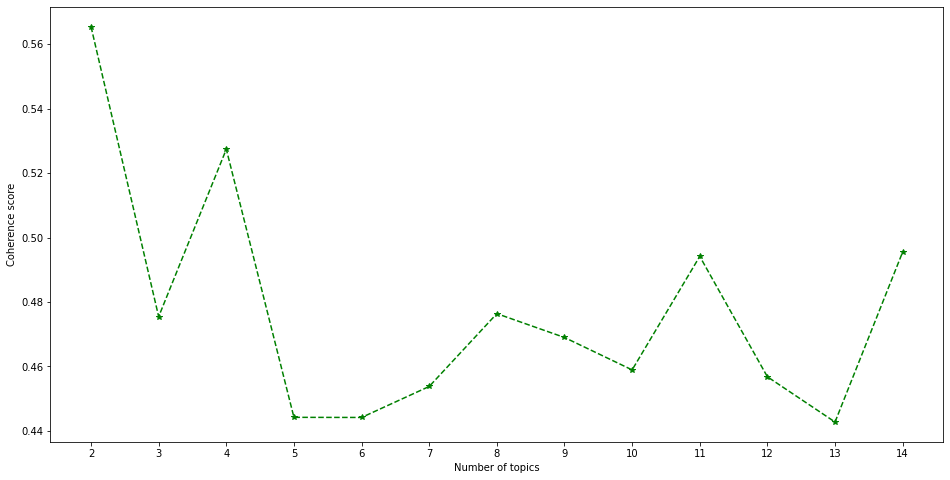

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(topic_num,cv_score,color='green', marker='*', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

### **Select the number of topics depending on the graph above and put the value in ``num_topic``**

In [ ]:
# Creating LDA model with number of topics as 2
Lda2 = gensim.models.ldamodel.LdaModel
ldamodel2 = Lda2(doc_term_matrix, num_topics=2, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel2,texts=df['cleaned_text'],dictionary=dictionary , coherence='c_v').get_coherence())

0.5654074262956892


In [ ]:
ldamodel2.print_topics()

[(0,
  '0.028*"traffic" + 0.025*"hydtpwebringawareness" + 0.023*"awareness" + 0.023*"today" + 0.021*"police" + 0.020*"conducted" + 0.019*"program" + 0.019*"roads" + 0.015*"observation" + 0.015*"connection"'),
 (1,
  '0.027*"roads" + 0.010*"please" + 0.009*"ktrtrs" + 0.009*"road" + 0.008*"telangana" + 0.006*"city" + 0.005*"people" + 0.004*"book" + 0.004*"lockdown" + 0.004*"available"')]

In [ ]:
vis2 = gensim_models.prepare(ldamodel2,doc_term_matrix,dictionary)
vis2

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.162627  0.0       1        1  71.017112
0     -0.162627  0.0       2        1  28.982888, topic_info=                        Term        Freq  ...  logprob  loglift
51                   traffic  377.000000  ...  30.0000  30.0000
10685  hydtpwebringawareness  303.000000  ...  29.0000  29.0000
2641               awareness  284.000000  ...  28.0000  28.0000
171                    today  312.000000  ...  27.0000  27.0000
10462              conducted  246.000000  ...  26.0000  26.0000
...                      ...         ...  ...      ...      ...
592                     auto   51.135903  ...  -5.4802   0.9516
15                      road  176.697824  ...  -4.2402   0.3307
375                    roads  227.189497  ...  -3.9889  -0.2902
5083               sudarshan   50.139175  ...  -5.4999   0.6516
7229                    35mm   34.367344  ...  -5.8776   0.4835

[125 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
7229       1  0.533397              35mm
7229       2  0.465013              35mm
20         1  0.967915          accident
20         2  0.035412          accident
1          1  0.997272         accidents
...      ...       ...               ...
3708       1  0.018708           wearing
3708       2  0.972841           wearing
10267      1  0.043764  welovekalyanbabu
10267      2  0.962811  welovekalyanbabu
110        1  0.999346       withcitizen

[155 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,cleaned_text
0,2021-05-24 09:35:23+00:00,1396761739748732932,#Hyderabad needs lot over #footbridge (#pedest...,rg_pavan,"[needs, footbridge, pedestrian, bridge, accide..."
1,2021-05-15 18:08:43+00:00,1393629433181851649,@SonuSood @flyspicejet I belong to very poor ...,EinsteinKing7,"[sonusood, flyspicejet, belong, poor, backgrou..."
2,2021-05-13 11:48:56+00:00,1392809078309593090,@overcover06 @BufferedStart Hyderabad traffic ...,sricharannch,"[overcover06, bufferedstart, traffic, rule, te..."
3,2021-05-12 11:27:18+00:00,1392441248049295361,@SoodFoundation @SonuSood \n*Help manoj*\nPati...,PrAvEeN_GaLi97,"[soodfoundation, sonusood, *help, manoj*, pati..."
4,2021-05-12 09:57:26+00:00,1392418630990581761,BETHALA MANOJ BABU \nHe met with an road accid...,Vineeth029,"[bethala, manoj, babu, road, accident, severe,..."


In [ ]:
# Creating a lookup table for topics
topic_data = pd.DataFrame((ldamodel2.print_topics()),columns=['TopicNumber','TopKeywords'])
topic_data['TopicName'] = ['road_topic', 'traffic_topic']
topic_data = topic_data[['TopicNumber','TopicName','TopKeywords']]
topic_data['TopKeywords'] = topic_data.TopKeywords.str.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_data.style.set_properties(subset=['TopKeywords'], **{'width': '300px'})



,TopicNumber,TopicName,TopKeywords
0,0,road_topic,"['traffic', 'hydtpwebringawareness', 'awareness', 'today', 'police', 'conducted', 'program', 'roads', 'observation', 'connection']"
1,1,traffic_topic,"['roads', 'please', 'ktrtrs', 'road', 'telangana', 'city', 'people', 'book', 'lockdown', 'available']"


In [ ]:
#Creating new columns and inserting topic numbers and names
for index,sent in enumerate(ldamodel2[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  df.loc[index,'TopicNumber'] = ','.join(str(x) for x in sorted(topic_num))

In [ ]:
for index,topic_num in enumerate(df.TopicNumber):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_data.loc[topic_data.TopicNumber == single_topic_num,'TopicName'][single_topic_num])
  # Extracting topic names from lookup table
  df.loc[index,'TopicName'] =' & '.join(topic_name_list)

In [ ]:
df.head()

,Datetime,Tweet Id,Text,Username,cleaned_text,TopicNumber,TopicName
0,2021-05-24 09:35:23+00:00,1396761739748732932,#Hyderabad needs lot over #footbridge (#pedest...,rg_pavan,"[needs, footbridge, pedestrian, bridge, accide...",1,traffic_topic
1,2021-05-15 18:08:43+00:00,1393629433181851649,@SonuSood @flyspicejet I belong to very poor ...,EinsteinKing7,"[sonusood, flyspicejet, belong, poor, backgrou...",1,traffic_topic
2,2021-05-13 11:48:56+00:00,1392809078309593090,@overcover06 @BufferedStart Hyderabad traffic ...,sricharannch,"[overcover06, bufferedstart, traffic, rule, te...",1,traffic_topic
3,2021-05-12 11:27:18+00:00,1392441248049295361,@SoodFoundation @SonuSood \n*Help manoj*\nPati...,PrAvEeN_GaLi97,"[soodfoundation, sonusood, *help, manoj*, pati...",1,traffic_topic
4,2021-05-12 09:57:26+00:00,1392418630990581761,BETHALA MANOJ BABU \nHe met with an road accid...,Vineeth029,"[bethala, manoj, babu, road, accident, severe,...",1,traffic_topic


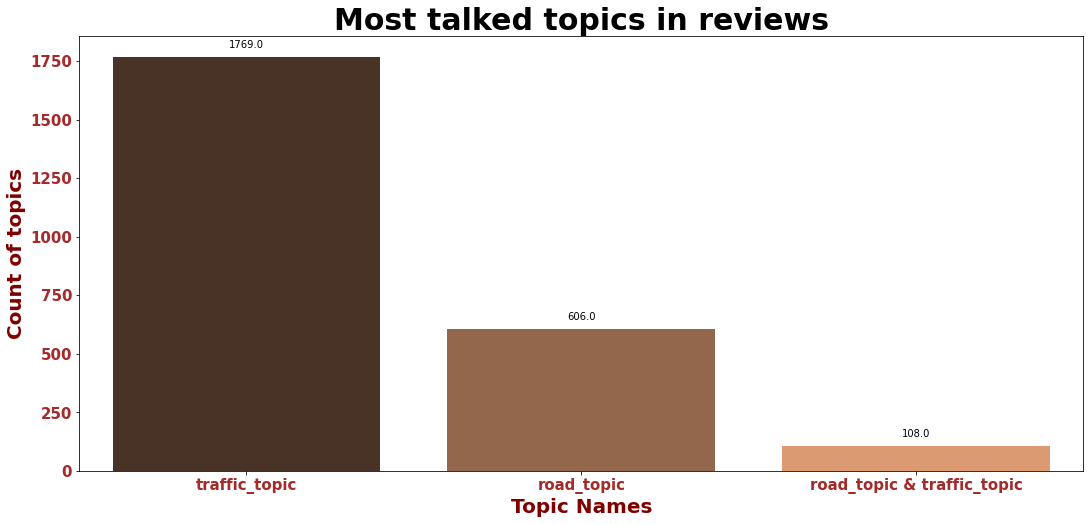

In [ ]:
#Visualisation
plt.figure(figsize=(18,8))
ax = sns.barplot(x=df.TopicName.value_counts()[:6].index,y=df.TopicName.value_counts()[:6].values, palette = 'copper')
# Labeling each bar
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
# Labelling
plt.xticks(size=15, weight = 'bold', color = 'brown')
plt.yticks(size=15, weight = 'bold', color = 'brown')
plt.xlabel('Topic Names',size=20, weight = 'bold', color = 'maroon')
plt.ylabel('Count of topics',size=20, weight = 'bold', color = 'maroon')
plt.title('Most talked topics in reviews',size=30, weight = 'bold')
plt.show()



## **Observations:**
- Most reviews were about Batteries. Followed by Call and connectivity.


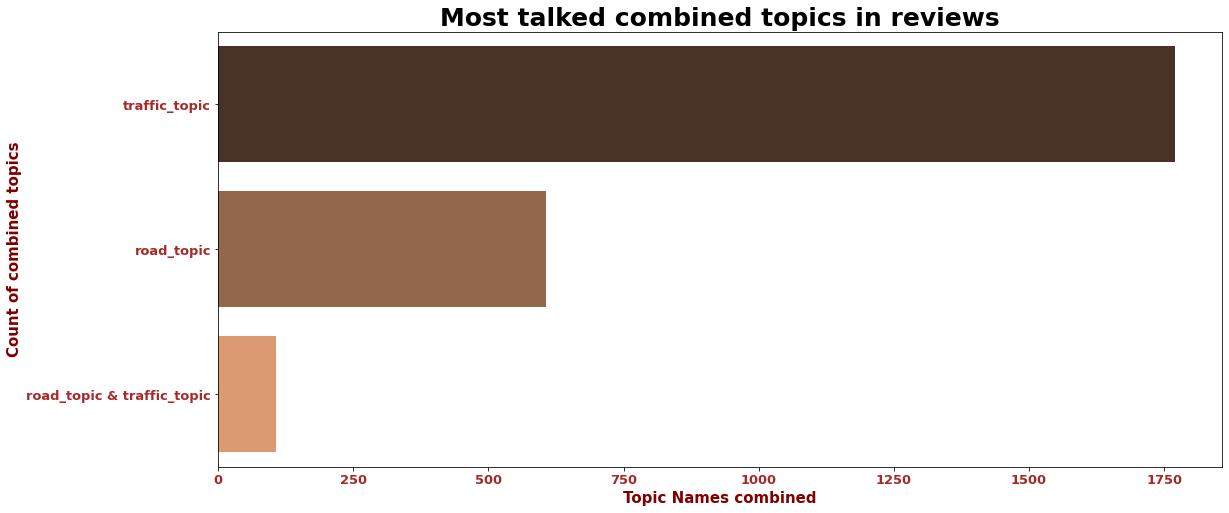

In [ ]:
plt.figure(figsize=(18,8))
ax = sns.barplot(y=df.TopicName.value_counts().index,x=df.TopicName.value_counts().values, palette = 'copper')
plt.xticks(size=13, weight = 'bold', color = 'brown')
plt.yticks(size=13, weight = 'bold', color = 'brown')
plt.xlabel('Topic Names combined',size=15, weight = 'bold', color = 'maroon')
plt.ylabel('Count of combined topics',size=15, weight = 'bold', color = 'maroon')
plt.title('Most talked combined topics in reviews',size=25, weight = 'bold')

plt.show();